# Assignment 1
This assignment has two questions:
 - Q1: Probability
 - Q2: Linear Regression

Utilize the designated cell within this notebook to complete the exercises. As for the Python exercises:
- Refrain from altering the provided code; simply fill in the missing portions as indicated.
- Do not use any additional libraries beyond those already included in the code (e.g., NumPy and Matplotlib library).
- Make sure that the output of all code cells is visible in your submitted notebook. **The evaluator is NOT expected to execute your code before grading your submission.**
   
Please identify the authors of this assignment in the cell below.

# **Identification**

* **Name:** Liu Cong
* **Student Number:**

* **Name:** Ulloa Ferrer Leonardo
* **Student Number:**


---


**Note:** This work is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.
To generate the pdf file we have first to covert the notebook to html using the command `!jupyter nbconvert --to html "ML_project2.ipynb"`, then open the html file and printout to PDF.

## 1. Probability exercise
A city has 3 RADARs (𝐴,
𝐵, and
𝐶) in different locations to detect aerial threats.  These sensors have a stochastic detection capability as a function of range coordinates **x=**$(x_1, x_2)$, which can be modeled by a 2D Gaussian distribution $N (\mu, \Sigma)$. Any moving object appearing in the air will generate a footprint area in the detection range  of each RADAR that is used to estimate the probability of that threat be properly detected:
Each RADAR has a particular stochastic model:
 - 𝐴 is unknown but there is a dataset available;
 - 𝐵 is unknown but there is a dataset available;
 - 𝐶 is described below:

\begin{align}
\mu_C = \begin{pmatrix}
1.5 \\
1.5  
\end{pmatrix},
\end{align}

\begin{align}
\Sigma_C = \begin{pmatrix}
0.5 & 0.0 \\
0.0 & 0.5
\end{pmatrix}.
\end{align}

𝐴, 𝐵 and 𝐶 have independent sensing capabilities.

In [2]:
# Load libraries that you are allowed to use
import numpy as np
import matplotlib.pyplot as plt

a)  **characterize the detection capability of RADARs 𝐴 and 𝐵, by writing the formulas for the parameter estimates and probability density functions of each distribution.**

First, indicate all mathematical expressions that are needed to solve this exercise and then, implement the solution in Python.


Tip: use the [Latex syntaxe](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/main/lessons/00/intro_to_latex.ipynb#scrollTo=QOEFZmw4Z1GJ) to show the mathematical expessions.

## Mathematical expressions
### Multivariate Normal Distribution
The probablity density function is the following 

$$p(\mathbf{x}) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x} - \mu)^{\top} \Sigma^{-1} (\mathbf{x} - \mu) \right)
$$


The estimator for the mean is the following

$$\hat{\mu} = \frac{1}{n} \sum_{k=1}^{n} \mathbf{x}_k$$

and for the covariance matrix are the following
$$\hat{\Sigma} = \frac{1}{n} \sum_{k=1}^{n} (\mathbf{x}_k - \hat{\mu})(\mathbf{x}_k - \hat{\mu})^{\top}$$

In [57]:
# Read the text file back into a NumPy array
try:
    X_A = loaded_array = np.loadtxt("ml_dataset_q1_A", delimiter=' ')
    X_B = loaded_array = np.loadtxt("ml_dataset_q1_B", delimiter=' ')
    X_A_B_C = loaded_array = np.loadtxt("ml_dataset_q1_A_B_C", delimiter=' ')
except:
    X_A = loaded_array = np.loadtxt("ML_Assign1_Data\\ml_dataset_q1_A", delimiter=' ')
    X_B = loaded_array = np.loadtxt("ML_Assign1_Data\\ml_dataset_q1_B", delimiter=' ')
    X_A_B_C = loaded_array = np.loadtxt("ML_Assign1_Data\\ml_dataset_q1_A_B_C", delimiter=' ')

In [112]:
# ToDo the code
#...
# 53 Pattern Classification (Duda)
# 112 Pattern Classification (Duda)
def compute_mean(data):
    return np.mean(data,axis= 0)
    
def compute_cov_mat(data:np.ndarray, estimated_mean):
    temp = data - estimated_mean
    aabb = np.mean(temp**2,axis= 0)
    ab = np.mean(np.prod(temp,axis= 1),axis = 0)
    return np.asanyarray([[aabb[0],ab],[ab,aabb[1]]])

mean_A = compute_mean(X_A)
cov_A = compute_cov_mat(X_A,mean_A)

mean_B = compute_mean(X_B)
cov_B = compute_cov_mat(X_B,mean_B)


mean_C = np.asanyarray([1.5,1.5])
cov_C = np.asanyarray([[0.5,0],[0,0.5]])

print("mean A = ", mean_A)
print("Cov A  = ", cov_A, "\n\r")
print("mean B = ", mean_B)
print("Cov B  = ", cov_B, "\n\r")

# ...



mean A =  [0.89750403 1.30273791]
Cov A  =  [[0.96497215 0.26243063]
 [0.26243063 1.27931114]] 

mean B =  [2.31641946 2.31896158]
Cov B  =  [[ 0.92891508 -0.27338534]
 [-0.27338534  1.36258959]] 





b) **Calculate the probability density of a potential threat at grid coordinate (1.5, 1.5) be detected by 𝐴. Repeat for 𝐵.** Implement the solution in Python.

In [91]:
def pda_multivariate_normal(mean: np.ndarray, cov: np.ndarray, x):
    det_cov = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = cov.shape[0]
    temp: np.ndarray = (x - mean)
    prefactor = 1 / np.sqrt((2 * np.pi)**d * det_cov)
    return prefactor*np.exp(-0.5*(temp@inv@temp.T))

x = np.asanyarray([1.5, 1.5])
p_A_when_x = pda_multivariate_normal(mean_A,cov_A,x)
p_B_when_x = pda_multivariate_normal(mean_B,cov_B,x)
print("pdf(A = (1.5 1.5) ) =", p_A_when_x)
print("pdf(B = (1.5 1.5) ) =", p_B_when_x)

pdf(A = (1.5 1.5) ) = 0.12208241910114144
pdf(B = (1.5 1.5) ) = 0.06577001428291035


c) **What is the probability density of a threat in coordinate (1.9, 2.1) be detected by all city's RADARs ?** Implement the solution in Python. Plot the contour curves of the detection profile for each RADAR and for a threat being detected by all RADARs.

In [93]:
mean_C = np.asanyarray([1.5,1.5])
cov_C = np.asanyarray([[0.5,0],[0,0.5]])
p_A_when_x = pda_multivariate_normal(mean_A, cov_A,np.asanyarray([1.9,2.1]))
p_B_when_x = pda_multivariate_normal(mean_B, cov_B,np.asanyarray([1.9,2.1]))
p_C_when_x = pda_multivariate_normal(mean_C, cov_C,np.asanyarray([1.9,2.1]))
p_x_A_B_C = p_A_when_x*p_B_when_x*p_C_when_x
print("pdf(A = (1.9 2.1) ) =", p_A_when_x)
print("pdf(B = (1.9 2.1) ) =", p_B_when_x)
print("pdf(C = (1.9 2.1) ) =", p_C_when_x)
print("pdf(A, B, C) =", p_x_A_B_C)

## Curve curves
x_range        = np.linspace(-2, 6, 18)
y_range        = np.linspace(-2, 6, 18)
x_grid, y_grid = np.meshgrid(x_range, y_range)

#...


pdf(A = (1.9 2.1) ) = 0.07814620388718108
pdf(B = (1.9 2.1) ) = 0.12693356962182864
pdf(C = (1.9 2.1) ) = 0.18924176795831746
pdf(A, B, C) = 0.0018771603670604924


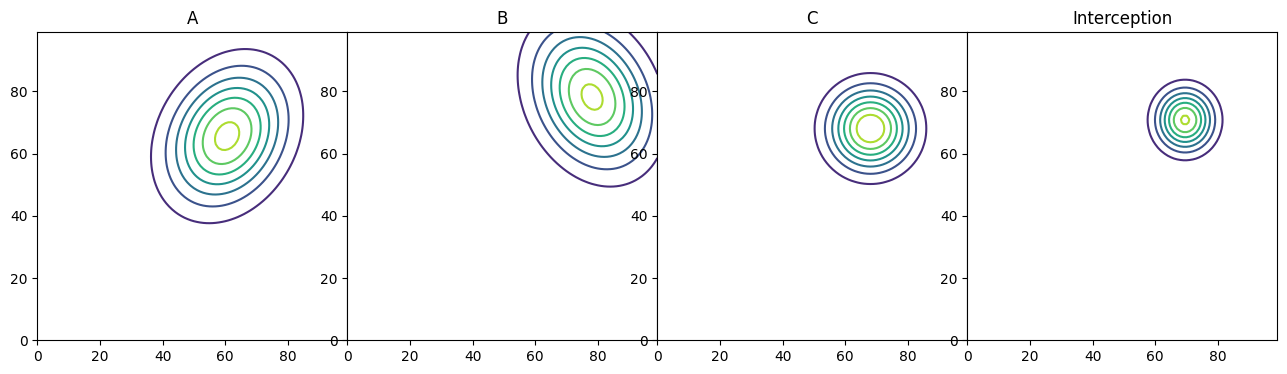

In [111]:

def plot_contour(mean_list, cov_list, names, size, min,max):
    x = np.linspace(min,max,size)
    xx, yy = np.meshgrid(x,x)
    # Compute pdf
    pdf_list = []
    for mean, cov in zip(mean_list, cov_list):
        img = np.zeros((size, size))    
        for i in range(size):
            for j in range(size):
                v = np.asanyarray([xx[i,j],yy[i,j]])
                img[i,j] = pda_multivariate_normal(mean,cov,v) 
        pdf_list.append(img)
    
    # Compute interceptions
    inter = np.ones((size, size))
    for img in pdf_list:
        inter *= img

    # plot pdf
    fig, axis = plt.subplots(1,len(pdf_list) + 1,figsize = ((len(pdf_list) + 1)*4, 4))
    fig.subplots_adjust(wspace=0)
    for i, (pdf,name) in enumerate(zip(pdf_list,names)):
        axis[i].contour(pdf)
        axis[i].set_title(name)
    
    # plot interception
    axis[len(pdf_list)].contour(inter)
    axis[len(pdf_list)].set_title('Interception')
plot_contour([mean_A,mean_B,mean_C],[cov_A,cov_B,cov_C], ['A','B','C'], 100,-4,4)

## 2. Linear regression exercise

The software of each RADAR analyses the orientations $(x_1, x_2)$ and the  signal strength ($x_3$) to calculate the range of a potential threat as $f(x) = \theta_0 + \theta_1 \sin(x_1) + \theta_2 \cos(x_2) + \theta_3 e^{x_3}$.

In [2]:
# Load libraries that you are allowed to use
import numpy as np
import matplotlib.pyplot as plt

a) **The optimal parameters for the linear regression problem can be obtained by solving
$$ \min_{\boldsymbol{\theta}} ||\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\theta}||_2^2 $$
for suitably defined matrices/vectors $\boldsymbol{\theta}$, $\boldsymbol{X}$, and $\boldsymbol{y}$. Provide explicit definitions for these matrices/vectors.**

Tip: use the [Latex syntaxe](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/main/lessons/00/intro_to_latex.ipynb#scrollTo=QOEFZmw4Z1GJ) to show the mathematical expessions.

$
\theta = [{\theta_0}, {\theta_1}, {\theta_2}, {\theta_3}]
$

$
X = \begin{bmatrix}
      1 & \sin(x_1)_1 & \cos(x_2)_1 & e^{x_3}_1 \\
      1 & \sin(x_1)_2 & \cos(x_2)_2 & e^{x_3}_2 \\
      \vdots & \vdots & \vdots & \vdots \\
      1 & \sin(x_1)_n & \cos(x_2)_n & e^{x_3}_n
    \end{bmatrix}
$

$
y = [y_1, y_2, y_3,..., y_n]
$

b) **Find the $\boldsymbol{\hat \theta}$ to this problem by considering the following dataset $\{(x_i, y_i)\}_{i=1}^n$.**

In [3]:
# Read the text file back into a NumPy array
dataset_q2_train = loaded_array = np.loadtxt("ML_Assign1_Data/ml_dataset_q2", delimiter=' ')
inputs_train = dataset_q2_train[:, 0:3]
y_train = dataset_q2_train[:, -2]   #label for the training

dataset_q2_test = loaded_array = np.loadtxt("ML_Assign1_Data/ml_dataset_q2_test", delimiter=' ')
inputs_test = dataset_q2_test[:, 0:3]  #similar inputs
y_test = dataset_q2_test[:, -1]   #label for the testing
# print(inputs_test)

$
\theta = (X^TX)^{-1}X^Ty
$

In [16]:
# ToDo the code
theta = np.zeros(4)  # just to prevent the code from throwing an error before it's fully implemented
#...

X_train = np.column_stack((
    np.ones_like(inputs_train[:, 0]),
    np.sin(inputs_train[:, 0]),
    np.cos(inputs_train[:, 1]),
    np.exp(inputs_train[:, 2])
))
X_test = np.column_stack((
    np.ones_like(inputs_test[:, 0]),
    np.sin(inputs_test[:, 0]),
    np.cos(inputs_test[:, 1]),
    np.exp(inputs_test[:, 2])
))
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

print(theta)

[1.37188057 0.93073861 0.65692721 0.95236527]


c) **Find the solution to the Ridge regression problem as defined in the previous exercise by completing the code below.** The variable `reg` in the code corresponds to the regularization weight $\lambda$.

$
\theta_{ridge} = (X^TX + \lambda I)^{-1}X^Ty
$

In [20]:
# ToDo the code
theta_ridge = np.zeros(4)  # just to prevent the code from throwing an error before it's fully implemented
reg         = 50.0  # regularization weight (DO NOT CHANGE)

#...
theta_ridge = np.linalg.inv(X_train.T @ X_train + reg * np.eye(X_train.shape[1])) @ X_train.T @ y_train
print(theta_ridge)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[0.5029711  0.49351004 0.34860378 1.05199234]


d) **Compute the mean-squared errors (MSE) of the two models in the training set and in a separate test set.** Your should avoid utilizing for-loops. Use NumPy vectorized operations instead.

$
E = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2
$

MSE in the training data:
  Linear regression (no reg.): 27.86156
  Ridge regression (lambda = 50.0): 28.18931

MSE in the test data:
  Linear regression (no reg.): 1.12722
  Ridge regression (lambda = 50.0): 1.47922



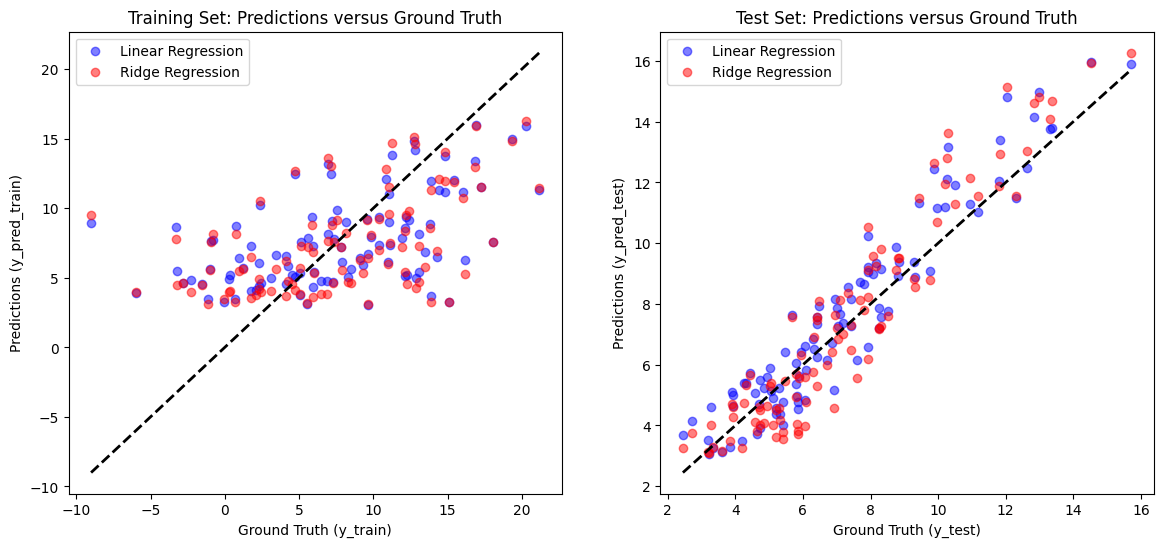

In [57]:
# ToDo the code
#...
y_pred_train = X_train @ theta
y_pred_train_ridge = X_train @ theta_ridge

y_pred_test = X_test @ theta
y_pred_test_ridge = X_test @ theta_ridge

# MSE
mse_train = np.mean((y_pred_train - y_train) ** 2)
mse_train_ridge = np.mean((y_pred_train_ridge - y_train) ** 2)

mse_test = np.mean((y_pred_test - y_test) ** 2)
mse_test_ridge = np.mean((y_pred_test_ridge - y_test) ** 2)

print("MSE in the training data:")
print(f"  Linear regression (no reg.): {mse_train:.5f}")
print(f"  Ridge regression (lambda = {reg}): {mse_train_ridge:.5f}\n")

print("MSE in the test data:")
print(f"  Linear regression (no reg.): {mse_test:.5f}")
print(f"  Ridge regression (lambda = {reg}): {mse_test_ridge:.5f}\n")

# plot predictions versus ground truth
#...

plt.figure(figsize=(14, 6))

# y_train
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Linear Regression', color='b')
plt.scatter(y_train, y_pred_train_ridge, alpha=0.5, label='Ridge Regression', color='r')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Ground Truth (y_train)')
plt.ylabel('Predictions (y_pred_train)')
plt.title('Training Set: Predictions versus Ground Truth')
plt.legend()

# y_test
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Linear Regression', color='b')
plt.scatter(y_test, y_pred_test_ridge, alpha=0.5, label='Ridge Regression', color='r')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Ground Truth (y_test)')
plt.ylabel('Predictions (y_pred_test)')
plt.title('Test Set: Predictions versus Ground Truth')
plt.legend()

plt.show()


e) **Would you select the Linear model or the Ridge model for deploying the solution to a potential customer?** Explain your answer.

#### I prefer select the Ridge model for deploying the solution to customers. Although the linear regression model has a smaller MSE compared to the Ridge regression model on both the training and test sets. But the ability of a model to generalize to new data is crucial in real-world scenarios. Ridge regression prevents overfitting to the training data through regularization and suppresses large parameter variations, which makes it more likely to perform stably on potential future data.

_______________________
END of assignment!